# Abseentism at work

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
data=pd.read_csv('C:/Users/hp/Downloads/Abseentism100.csv')
dat

,Employee Name,Gender,Age,Years of Experience,Service Time( 8*30 =240),Abseentismworkinhours,ReasonforAbseentism,Target given for each employee (10),Target Achieved by each employee (10),"Performer (1,2,3)",Disciplinary failure,WorkSatisfactionscore,Abseentism
0,Owens,Male,41,3,218,22,2,3,3,2,0,75,0
1,Bennett,Female,34,1,226,14,3,8,7,3,0,71,0
2,Casey,Male,30,3,228,12,4,4,1,3,0,74,1
3,Ryan,Female,39,4,183,57,4,8,5,1,1,78,1
4,Harris,Female,40,5,227,13,2,10,9,3,0,75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Smith,Male,37,4,183,57,4,6,6,1,0,84,0
96,Hawkins,Female,38,4,239,1,2,3,3,3,0,87,0
97,Owens,Female,40,4,181,59,4,6,6,1,0,66,1
98,Fowler,Female,40,4,216,24,3,2,2,2,0,87,0


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Employee Name                          100 non-null    object
 1   Gender                                 100 non-null    object
 2   Age                                    100 non-null    int64 
 3   Years of Experience                    100 non-null    int64 
 4   Service Time( 8*30 =240)               100 non-null    int64 
 5   Abseentismworkinhours                  100 non-null    int64 
 6   ReasonforAbseentism                    100 non-null    int64 
 7   Target given for each employee (10)    100 non-null    int64 
 8   Target Achieved by each employee (10)  100 non-null    int64 
 9   Performer (1,2,3)                      100 non-null    int64 
 10  Disciplinary failure                   100 non-null    int64 
 11  WorkSatisfactionscor

In [4]:
data.columns

Index(['Employee Name', 'Gender', 'Age', 'Years of Experience',
       'Service Time( 8*30 =240)', 'Abseentismworkinhours',
       'ReasonforAbseentism', 'Target given for each employee (10)',
       'Target Achieved by each employee (10)', 'Performer (1,2,3)',
       'Disciplinary failure', 'WorkSatisfactionscore', 'Abseentism'],
      dtype='object')

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100.0,35.30,4.288816,28.0,31.0,36.0,39.0,42.0
Years of Experience,100.0,3.02,1.385203,1.0,2.0,3.0,4.0,5.0
Service Time( 8*30 =240),100.0,209.96,18.309307,181.0,196.0,209.5,226.0,240.0
Abseentismworkinhours,100.0,30.04,18.309307,0.0,14.0,30.5,44.0,59.0
ReasonforAbseentism,100.0,2.78,1.010850,1.0,2.0,3.0,4.0,4.0
Target given for each employee (10),100.0,5.66,2.602330,2.0,3.0,6.0,8.0,10.0
Target Achieved by each employee (10),100.0,4.66,2.731115,1.0,2.0,4.0,7.0,10.0
"Performer (1,2,3)",100.0,1.78,0.811284,1.0,1.0,2.0,2.0,3.0
Disciplinary failure,100.0,0.08,0.272660,0.0,0.0,0.0,0.0,1.0
WorkSatisfactionscore,100.0,75.50,6.784564,65.0,69.0,75.0,81.0,88.0


In [6]:
data.isna().values.any()

False

In [7]:
data["ReasonforAbseentism"] = data["ReasonforAbseentism"].map({1: "Group_1", 2: "Group_2", 3: "Group_3", 4: "Group_4"})
# data["Reason for Absence"] = data["Reason for Absence"].astype("category").cat.codes
data["ReasonforAbseentism"].value_counts()
#health #personal #vacation #workenvironment

Group_3    36
Group_4    28
Group_2    22
Group_1    14
Name: ReasonforAbseentism, dtype: int64

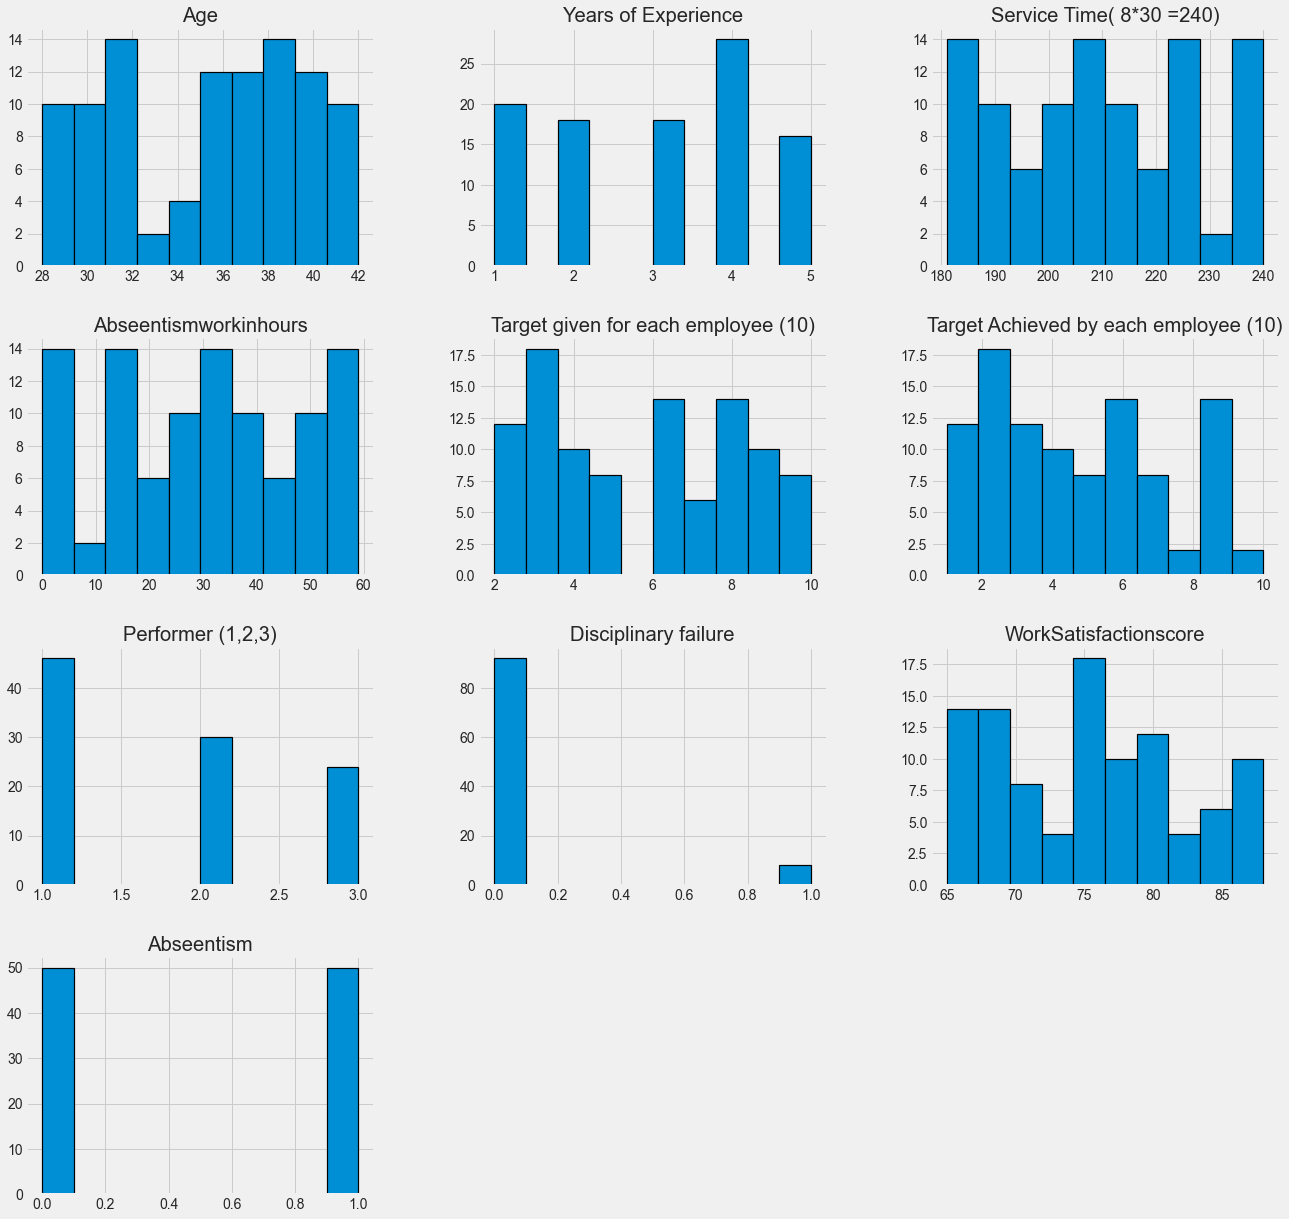

In [8]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<AxesSubplot:>

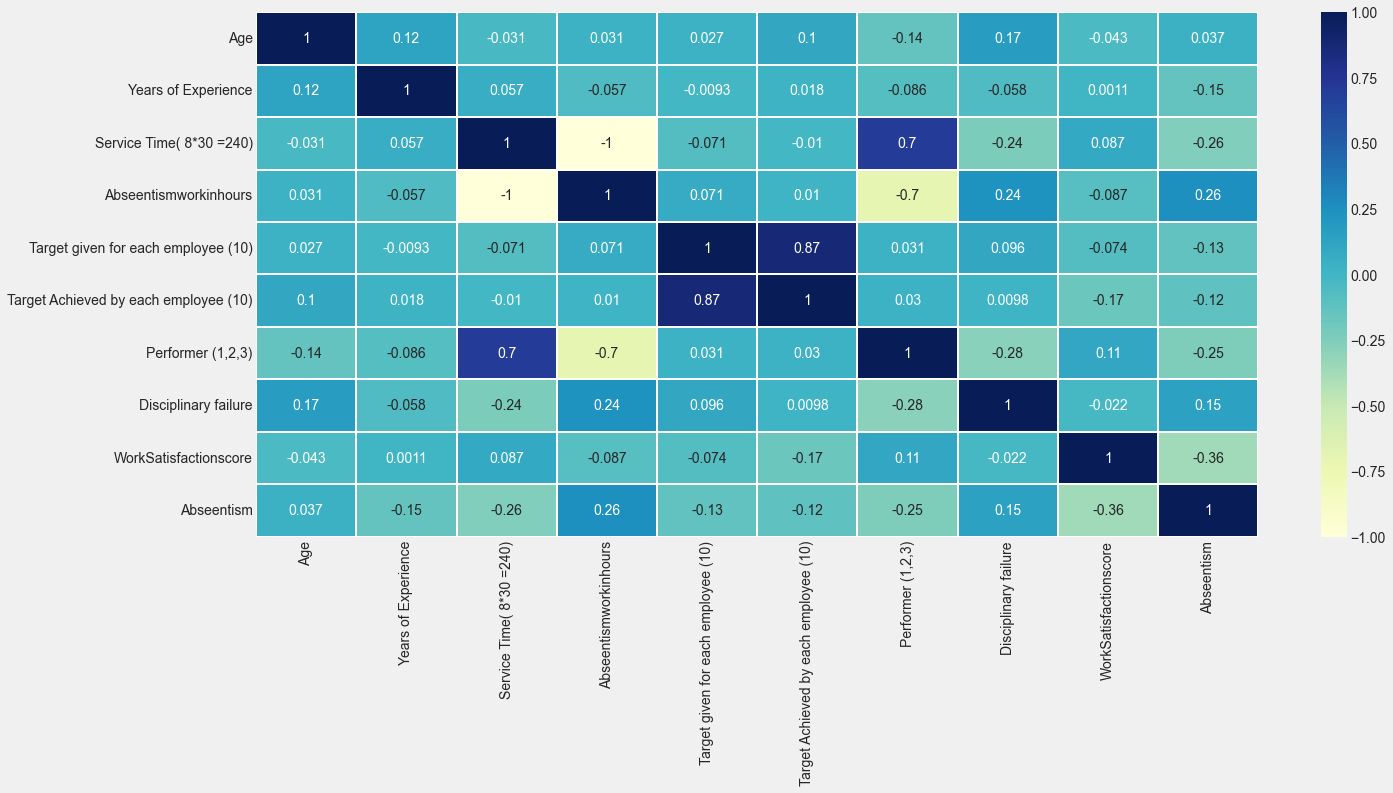

In [9]:
corrmat = data.corr()
f, ax = plt.subplots(figsize =(20, 9))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True)

<AxesSubplot:>

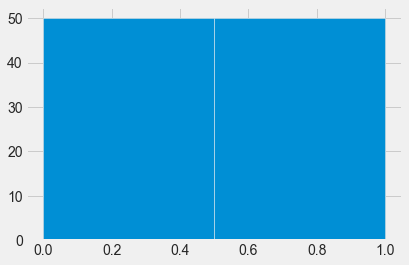

In [10]:
data['Abseentism'].hist(bins=data['Abseentism'].nunique())

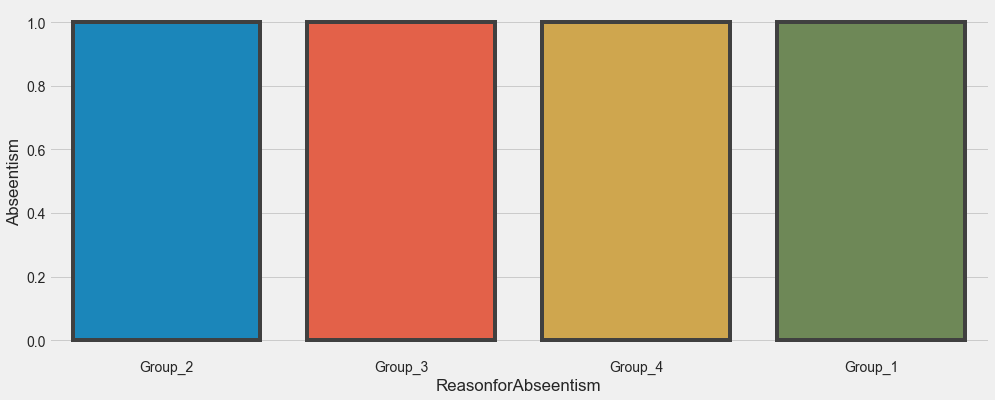

In [11]:
plt.figure(figsize = (15, 6))
sns.boxplot(x = data['ReasonforAbseentism'], y = data['Abseentism'])
plt.show()

# Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [13]:
x = data[['Age','Years of Experience','Service Time( 8*30 =240)','Target given for each employee (10)','Target Achieved by each employee (10)','Abseentismworkinhours','Performer (1,2,3)','Disciplinary failure','WorkSatisfactionscore']]
y = data['Abseentism']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=1)

In [14]:
df_model = DecisionTreeClassifier(criterion='entropy')
df_model.fit(train_x, train_y)
predict_y = df_model.predict(test_x)
print(classification_report(test_y, predict_y))
print("Accuracy:", accuracy_score(predict_y, test_y))
print("Confusion matrix: \n", confusion_matrix(predict_y, test_y))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.77      0.83      0.80        12

    accuracy                           0.75        20
   macro avg       0.74      0.73      0.73        20
weighted avg       0.75      0.75      0.75        20

Accuracy: 0.75
Confusion matrix: 
 [[ 5  2]
 [ 3 10]]


In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

In [16]:
plt.figure(figsize=(200, 100))
tree.plot_tree(df_model, filled=True, rounded=True)

[Text(0.5, 0.95, 'X[8] <= 69.5\nentropy = 0.998\nsamples = 80\nvalue = [42, 38]'),
 Text(0.3, 0.85, 'X[4] <= 8.0\nentropy = 0.61\nsamples = 20\nvalue = [3, 17]'),
 Text(0.2, 0.75, 'X[6] <= 2.5\nentropy = 0.31\nsamples = 18\nvalue = [1, 17]'),
 Text(0.1, 0.65, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.3, 0.65, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.75, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.85, 'X[2] <= 182.5\nentropy = 0.934\nsamples = 60\nvalue = [39, 21]'),
 Text(0.6, 0.75, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.75, 'X[7] <= 0.5\nentropy = 0.886\nsamples = 56\nvalue = [39, 17]'),
 Text(0.7, 0.65, 'X[0] <= 38.5\nentropy = 0.833\nsamples = 53\nvalue = [39, 14]'),
 Text(0.6, 0.55, 'X[5] <= 38.5\nentropy = 0.926\nsamples = 41\nvalue = [27, 14]'),
 Text(0.4, 0.45, 'X[6] <= 1.5\nentropy = 0.996\nsamples = 28\nvalue = [15, 13]'),
 Text(0.3, 0.35, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5, 0.35, 'X[8

In [17]:
print(tree.export_text(df_model))

|--- feature_8 <= 69.50
|   |--- feature_4 <= 8.00
|   |   |--- feature_6 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_6 >  2.50
|   |   |   |--- class: 0
|   |--- feature_4 >  8.00
|   |   |--- class: 0
|--- feature_8 >  69.50
|   |--- feature_2 <= 182.50
|   |   |--- class: 1
|   |--- feature_2 >  182.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_0 <= 38.50
|   |   |   |   |--- feature_5 <= 38.50
|   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |   |--- feature_8 <= 77.00
|   |   |   |   |   |   |   |--- feature_8 <= 72.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 220.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  220.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_8 >  72.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_8 

In [18]:
x = data[['Age','Service Time( 8*30 =240)','Target given for each employee (10)','Target Achieved by each employee (10)','Abseentismworkinhours','Performer (1,2,3)','Disciplinary failure','WorkSatisfactionscore']]
y = data['Abseentism']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=1)

# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_x, train_y)
predict_y_2 = rf_model.predict(test_x)
print(classification_report(test_y, predict_y_2))
print("Accuracy:", accuracy_score(predict_y_2, test_y))
print("Confusion matrix: \n", confusion_matrix(predict_y_2, test_y))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.91      0.83      0.87        12

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20

Accuracy: 0.85
Confusion matrix: 
 [[ 7  2]
 [ 1 10]]


# KNN Algorithm

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = data[['Age','Years of Experience','Service Time( 8*30 =240)','Target given for each employee (10)','Target Achieved by each employee (10)','Abseentismworkinhours','Performer (1,2,3)','Disciplinary failure','WorkSatisfactionscore']]
y = data['Abseentism']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=1)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=1)

In [23]:
pred = knn.predict(test_x)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y,pred))

[[ 5  3]
 [ 2 10]]


In [25]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.77      0.83      0.80        12

    accuracy                           0.75        20
   macro avg       0.74      0.73      0.73        20
weighted avg       0.75      0.75      0.75        20



In [26]:
error_rate = []

# Will take some time
for i in range(1,35):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))

Text(0, 0.5, 'Error Rate')

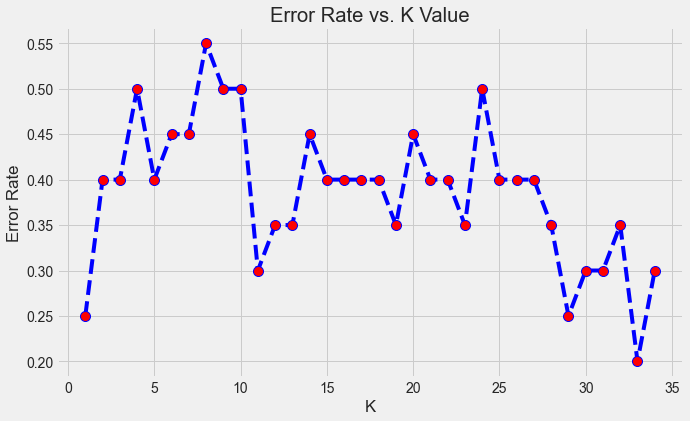

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,35),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(train_x,train_y)
pred = knn.predict(test_x)

print('WITH K=1')
print('\n')
print(confusion_matrix(test_y,pred))
print('\n')
print(classification_report(test_y,pred))

WITH K=1


[[ 5  3]
 [ 2 10]]


              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.77      0.83      0.80        12

    accuracy                           0.75        20
   macro avg       0.74      0.73      0.73        20
weighted avg       0.75      0.75      0.75        20



In [31]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=33
knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(train_x,train_y)
pred = knn.predict(test_x)

print('WITH K=33')
print('\n')
print(confusion_matrix(test_y,pred))
print('\n')
print(classification_report(test_y,pred))

WITH K=33


[[ 6  2]
 [ 2 10]]


              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.83      0.83      0.83        12

    accuracy                           0.80        20
   macro avg       0.79      0.79      0.79        20
weighted avg       0.80      0.80      0.80        20



In [58]:
#data=pd.read_csv('C:/Users/hp/Downloads/Abseentism100chart.csv')

In [57]:
#import pywedge as pw
#import pandas as pd

In [56]:
#data.head()

In [55]:
#ac = pw.Pywedge_Charts(data, c=None, y ='Abseentism')

In [54]:
#charts = ac.make_charts()